<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# A:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

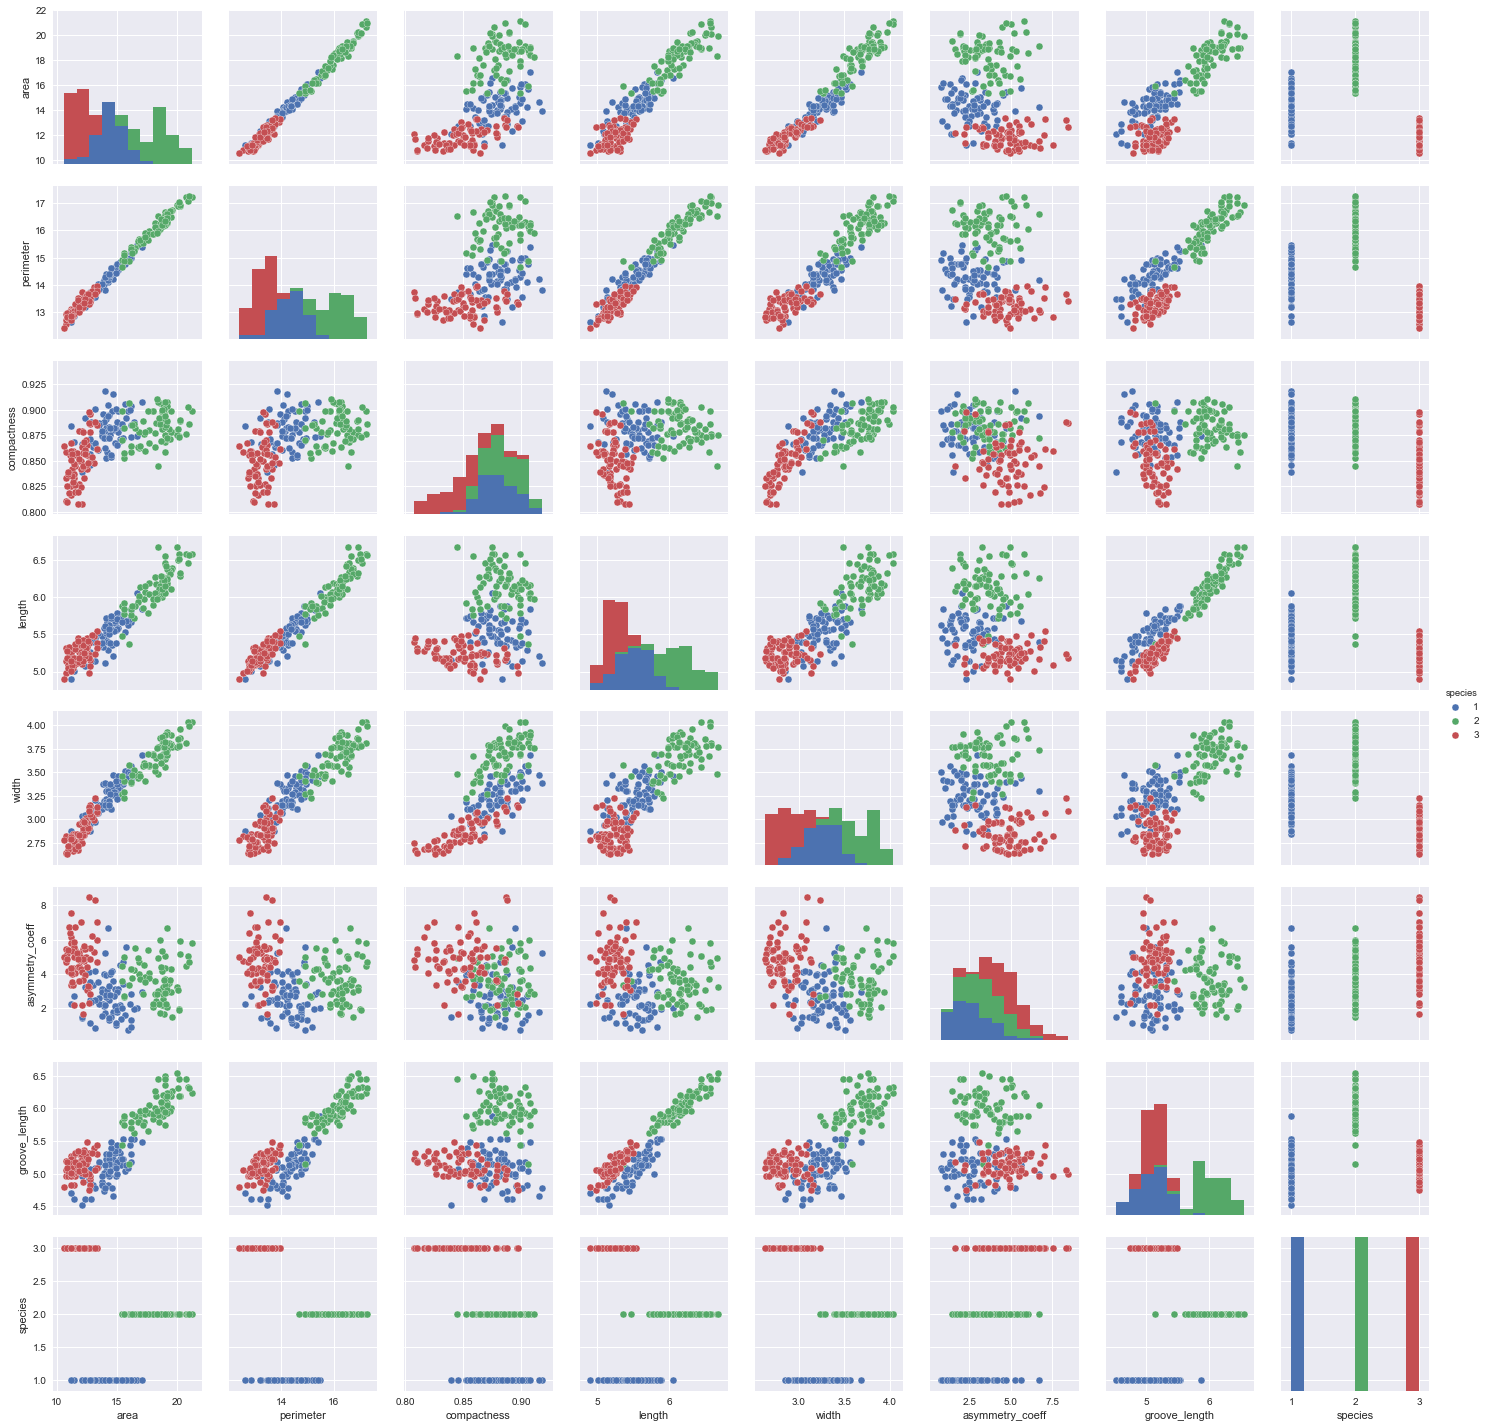

In [11]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds, hue='species')
# 3 groups, with group 1 (blue) tending to appear in the middle between groups 2 and 3 (red and green)

In [12]:
# Check for nulls
seeds.isnull().sum()
# no nulls found

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [13]:
# Look at the real species labels.
seeds['species'].value_counts()
# Species 1, Species 2, and Species 3 each have 70 instances in the dataset. So, they are balanced.

3    70
2    70
1    70
Name: species, dtype: int64

In [25]:
seeds.dtypes
# All variables are floats except for species.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [29]:
# Remove species column
X = seeds.drop('species', axis = 1)
y = seeds['species']

In [30]:
print('X', X.shape, 'Y', y.shape)

X (210, 7) Y (210,)


In [46]:
# Put features on same scale
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [47]:
from sklearn.cluster import KMeans

model = KMeans()   # normally would declare the n_clusters value, but letting it go to default here
model.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for out first clustering model.

In [48]:
# A:
# Labels
labels = model.labels_
print(labels)

# Centroids
clusters = model.cluster_centers_
print(clusters)

[1 1 4 4 1 4 1 4 2 1 2 4 4 4 4 4 4 1 4 5 1 1 1 4 1 1 5 5 1 5 4 1 1 1 1 1 2
 2 1 0 4 4 4 2 1 4 1 1 1 1 1 2 1 1 1 1 1 1 1 5 5 4 4 5 4 4 1 1 1 5 2 2 2 6
 2 2 2 7 7 2 2 7 7 6 6 6 6 6 7 7 6 6 6 7 7 2 6 6 6 6 2 6 7 6 6 6 6 2 6 6 6
 6 6 7 7 6 7 6 6 6 7 2 2 6 1 7 7 6 6 2 6 6 2 2 2 1 2 2 2 2 0 0 0 0 3 3 5 5
 5 3 3 3 3 3 3 3 5 3 3 3 5 5 3 5 0 4 3 5 3 5 3 3 5 3 3 5 3 3 3 5 5 0 5 5 0
 3 3 3 0 5 3 5 5 3 5 0 0 0 5 4 0 4 5 0 5 5 5 0 5 0]
[[-0.73357645 -0.77851567 -0.02830861 -0.79432134 -0.57715407  1.63647886
  -0.58243165]
 [ 0.04114033  0.04255033  0.38974696 -0.01138744  0.15629788 -0.88014798
  -0.39094239]
 [ 0.5931367   0.65893615  0.1895422   0.6436629   0.54410091  0.20937598
   0.72592719]
 [-1.17018947 -1.06435723 -1.78461728 -0.8319286  -1.40430091  0.9554635
  -0.4977156 ]
 [-0.50211597 -0.62020835  0.75639621 -0.83367777 -0.2373534  -0.78486756
  -1.11474912]
 [-0.97397565 -0.98214919 -0.64140018 -0.91974347 -0.97515803  0.01536126
  -0.76336273]
 [ 1.42363526  1.41068274  0.6830428   1

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [49]:
from sklearn.metrics import silhouette_score

# A:
# Calculate silhouette score
sil_score = silhouette_score(Xs, labels, metric='euclidean')
print('Silhouette score = ', sil_score)

Silhouette score =  0.259971228192


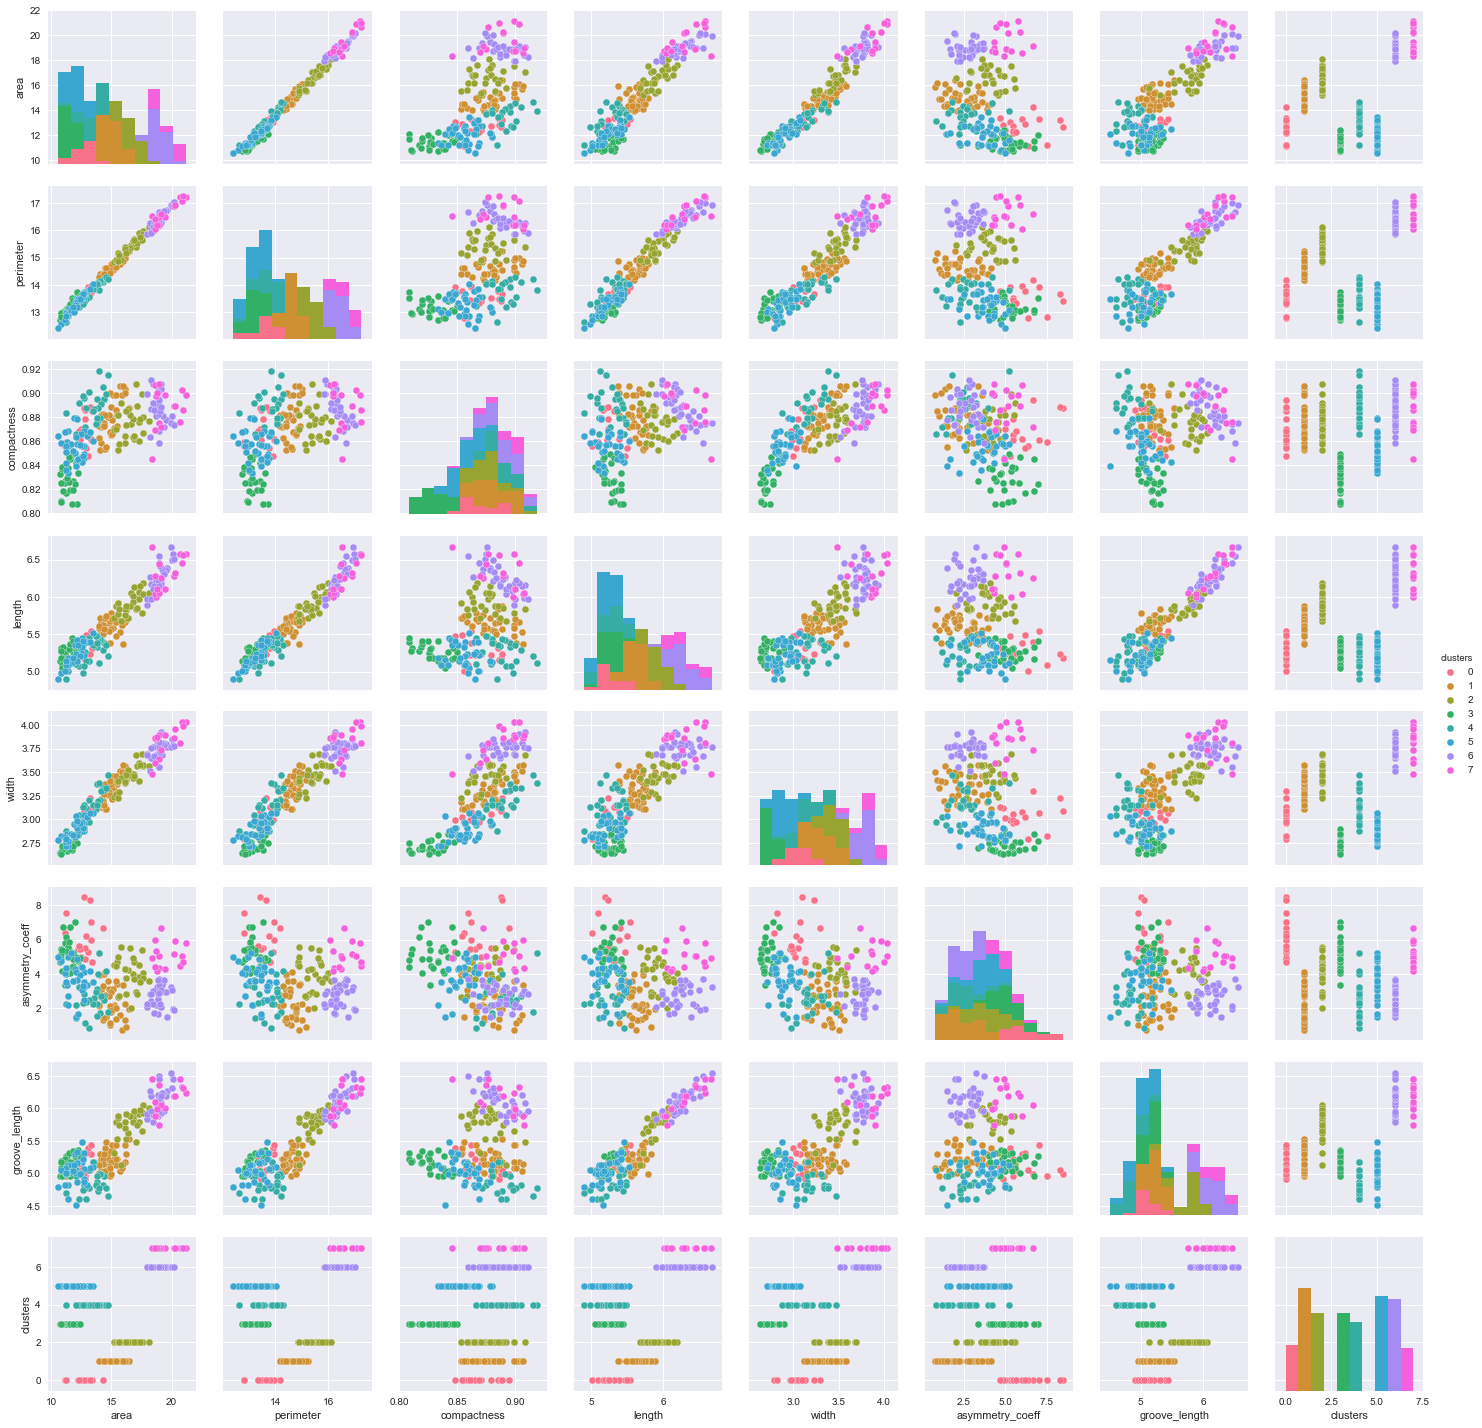

In [50]:
Xs_8 = seeds.drop('species', axis=1)
Xs_8['clusters']=labels

sns.pairplot(data=Xs_8, hue='clusters')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [51]:
import random

random.randint(1,25), random.randint(1,25)

(10, 18)

In [52]:
# A: Using 5 clusters
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Silhouette score =  0.259971228192


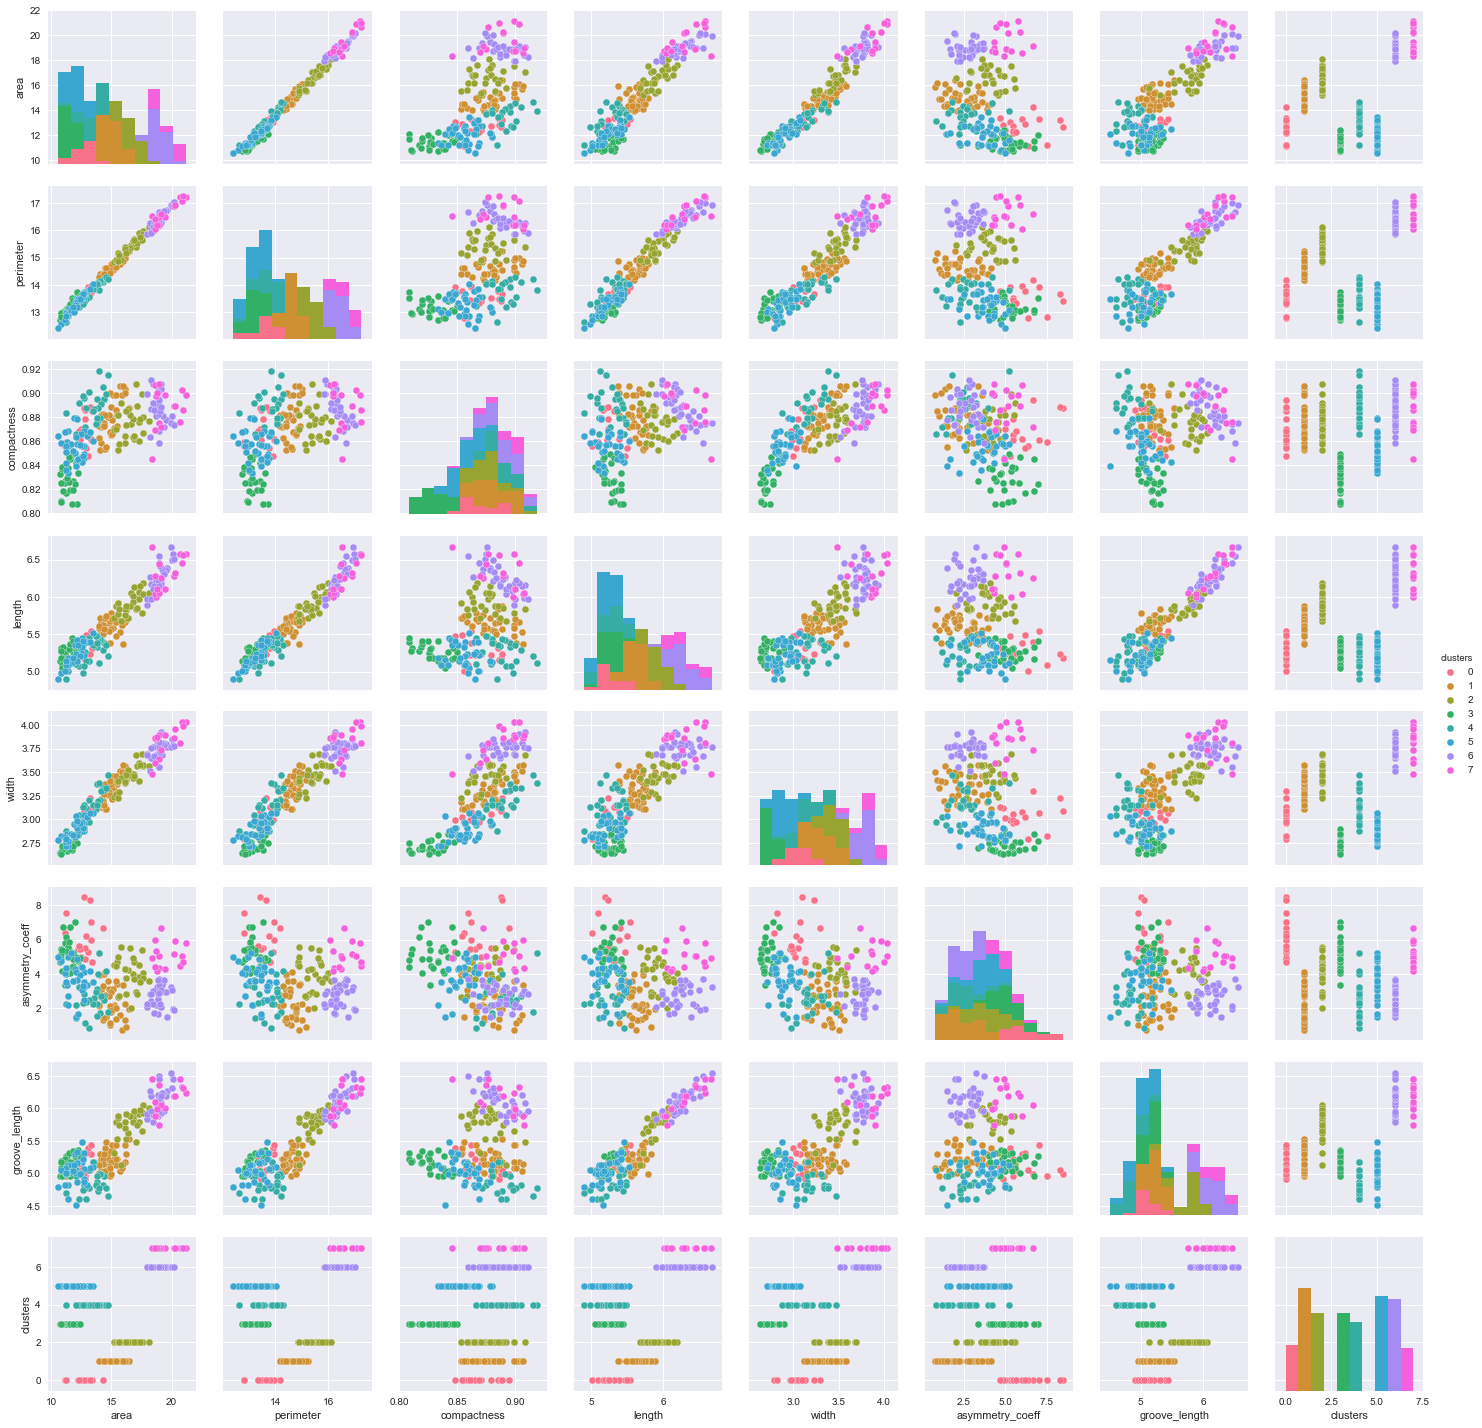

In [53]:
from sklearn.metrics import silhouette_score

# A:
sil_score = silhouette_score(Xs, labels, metric='euclidean')
print('Silhouette score = ', sil_score)

Xs_5 = seeds.drop('species', axis=1)
Xs_5['clusters']=labels

sns.pairplot(data=Xs_5, hue='clusters')

In [54]:
# A: Using 7 clusters
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)
model.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Silhouette score =  0.362074429185


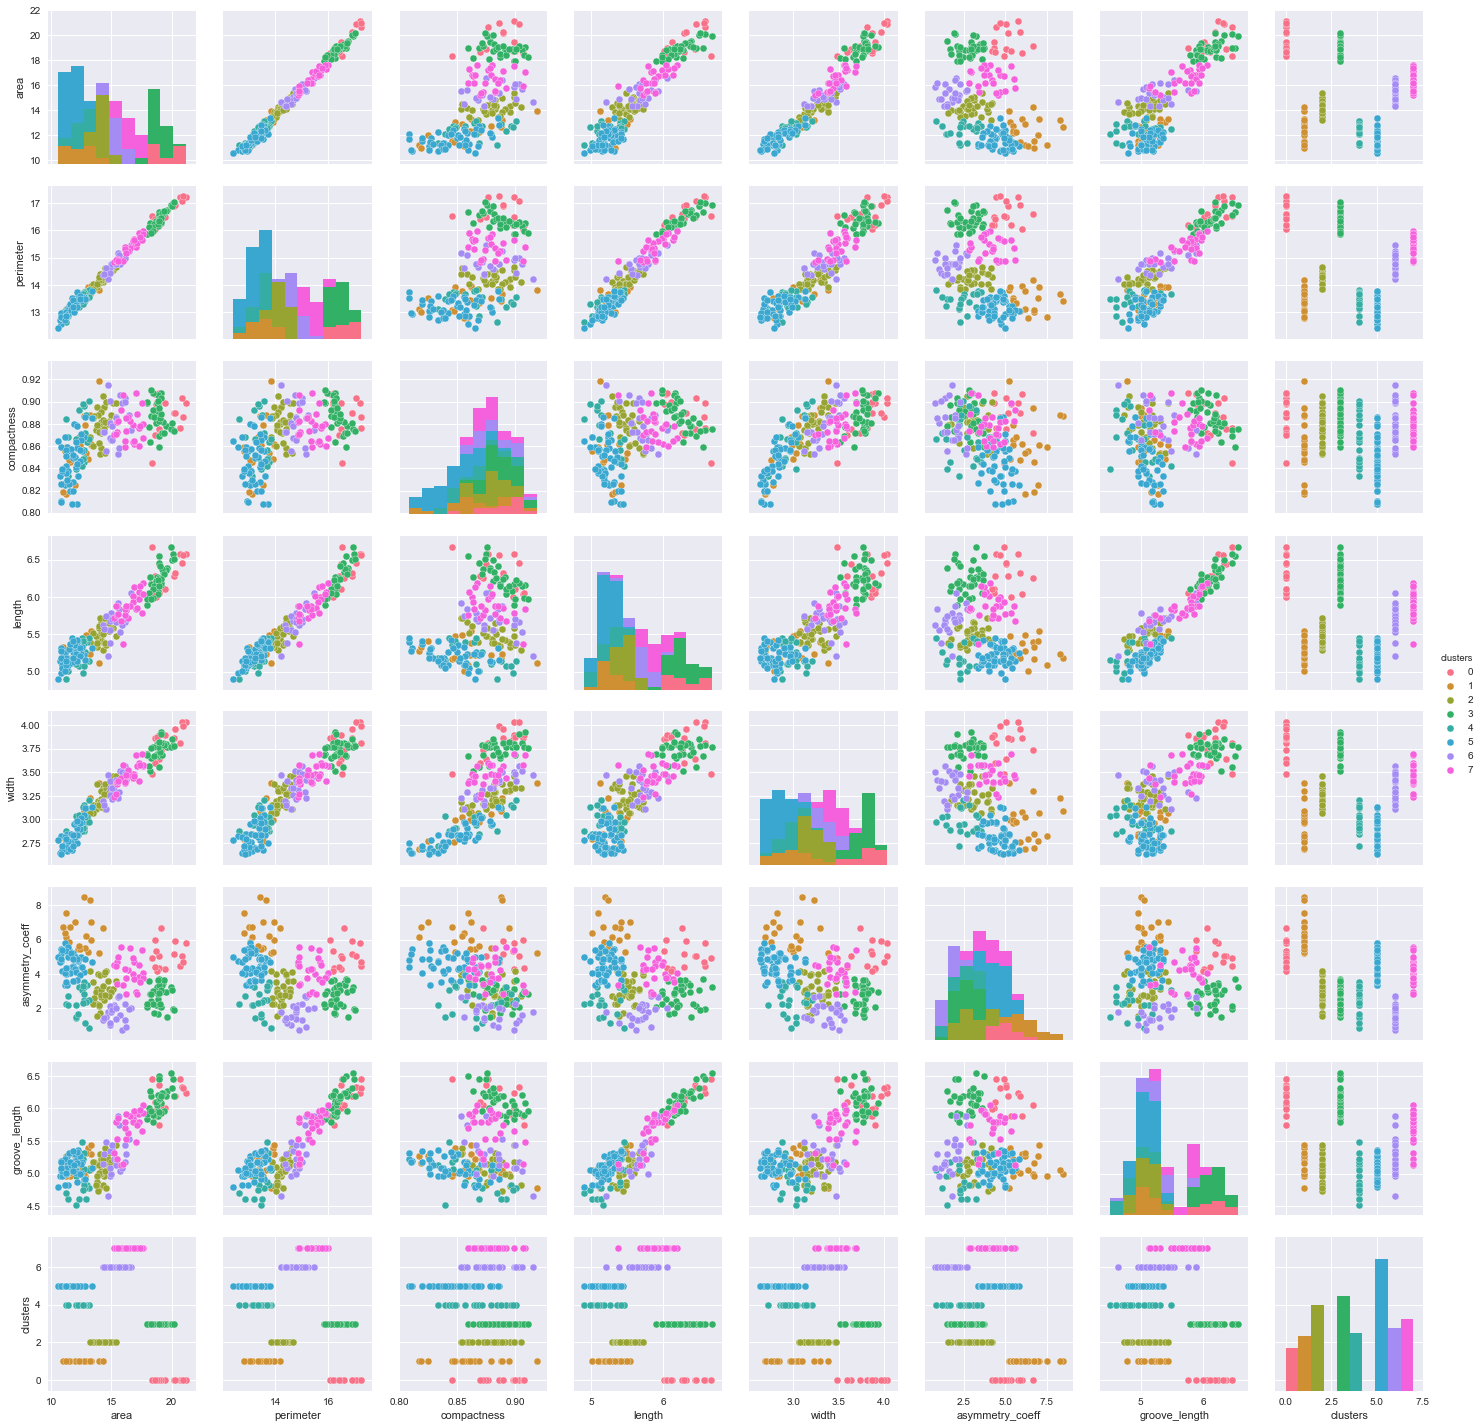

In [45]:
from sklearn.metrics import silhouette_score

# A:
sil_score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette score = ', sil_score)

X_7 = seeds.drop('species', axis=1)
X_7['clusters']=labels

sns.pairplot(data=X_7, hue='clusters')

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [55]:
# A:
# import preprocessors
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# create dataframe to hold new information (K value, silhoutte score, and scaling method)
results = pd.DataFrame(columns = ['k','silhouette','method'])

def cluster(rang, dataframe, version):  # rang = range. 'range' is a reserved word
    for k in rang:
        k_means = KMeans(n_clusters=k)
        k_means.fit(dataframe)
        labels = k_means.labels_
        score = silhouette_score(dataframe, labels)
        results.loc[len(results)]=['c'+str(k), score, version]

In [61]:
def optimal_cluster(rang, dataframe):
    cluster(rang, dataframe, 'default')
    
    # Normalized data
    Xn = normalize(dataframe)
    cluster(rang, Xn, 'Normalized')
    
    # Standardized data
    ss = StandardScaler()
    Xs = ss.fit_transform(dataframe)
    cluster(rang, Xs, 'Standardized')
    
    # MinMax scaled data
    mm = MinMaxScaler()
    Xm = mm.fit_transform(dataframe)
    cluster(rang, Xm, 'MinMax')
    
    return results.loc[results['silhouette'].idxmax()]

In [62]:
rang = list(range(2,20))

optimal_cluster(rang,X)

# The function says the optimal parameter is 2 clusters, no preprocessing needed (default)

k                   c2
silhouette    0.518287
method         default
Name: 0, dtype: object

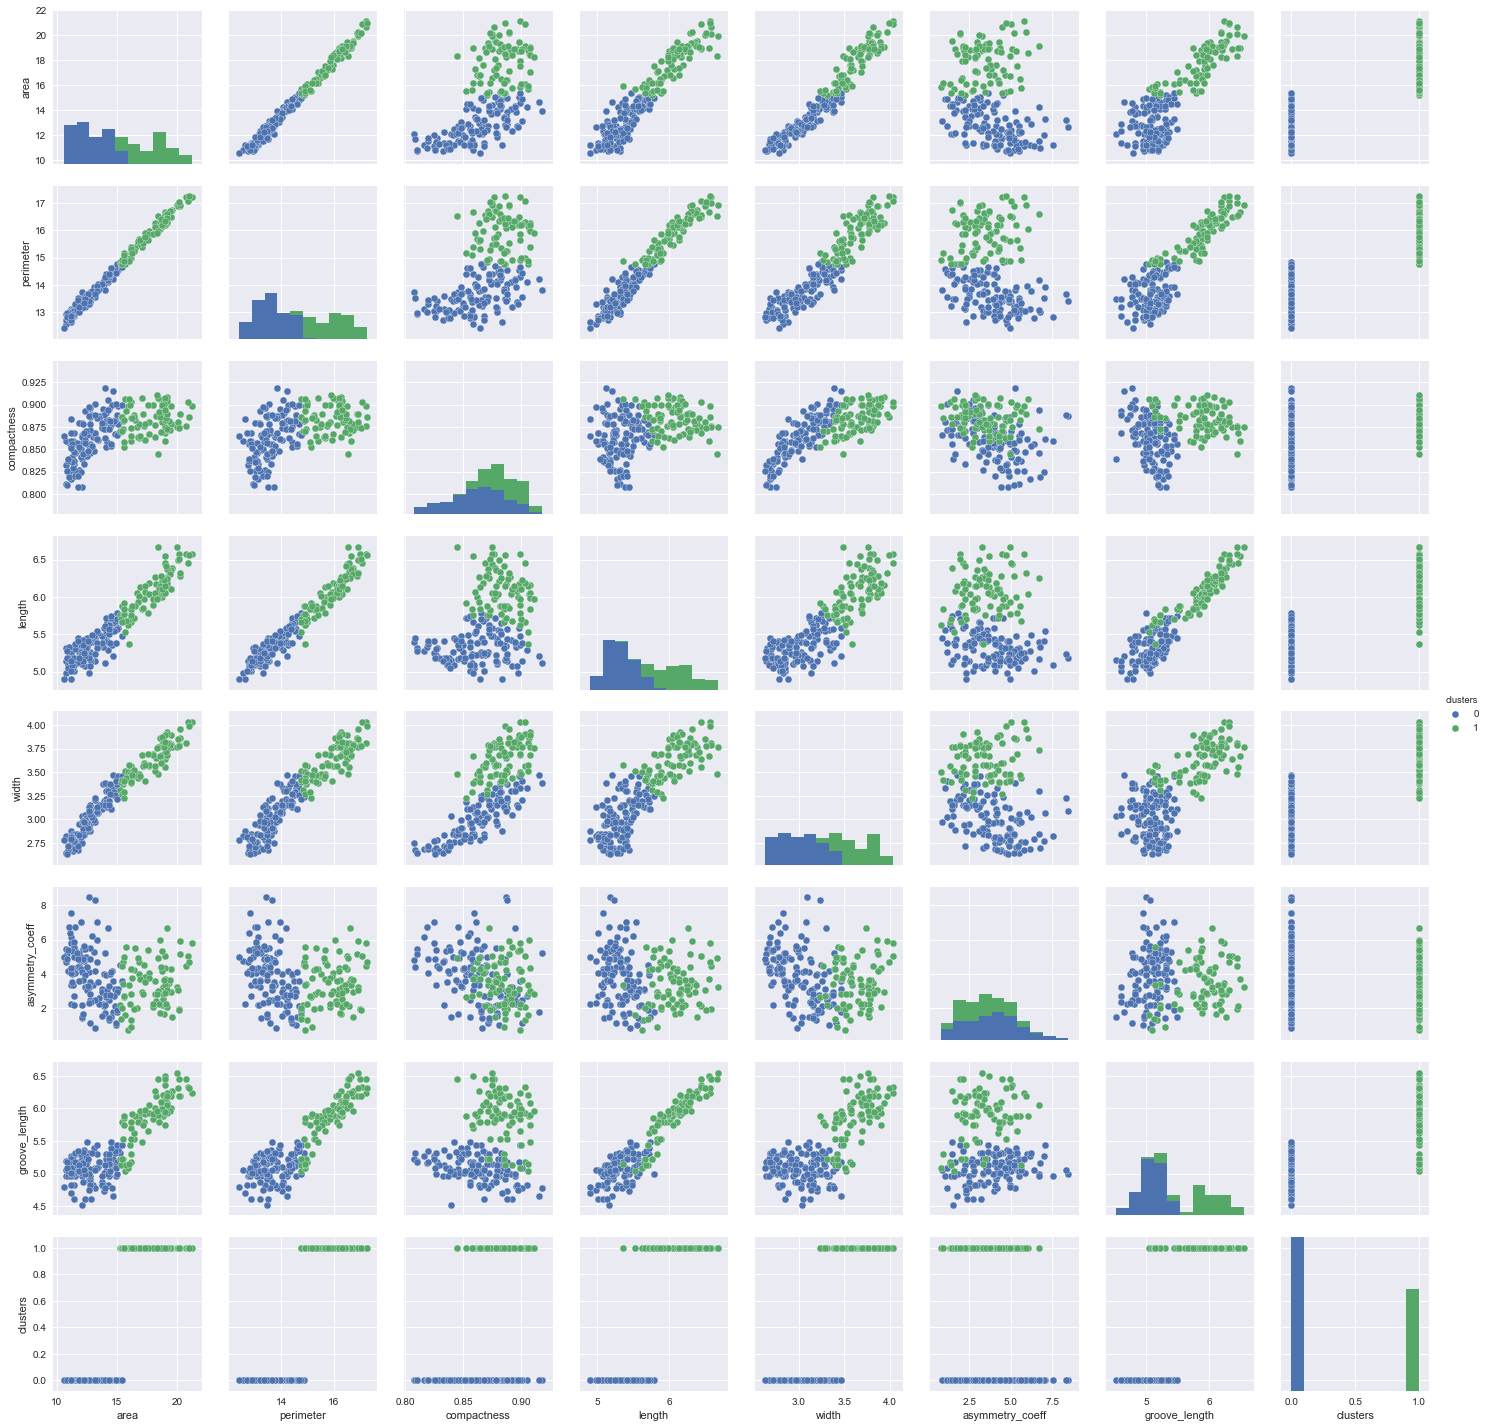

In [64]:
# Model with the optimized parameters used
opti_model = KMeans(n_clusters=2)
opti_model.fit(X)
labels_opti_model = opti_model.labels_

X_opti = seeds.drop('species', axis=1)

X_opti['clusters']=labels_opti_model
sns.pairplot(data=X_opti, hue='clusters')


In [ ]:
# From the species column in the original dataset, we know that there are 3 species. But the function is suggesting
# only 2 clusters of species